<a href="https://colab.research.google.com/github/Davioliveira1305/Simulacao-Estocastica/blob/main/Lista2_Simula%C3%A7%C3%A3oEstoc%C3%A1stica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1ª Questão Letra A:

In [1]:
%pip install simpy

In [2]:
import numpy as np
import simpy as sp

In [3]:
import simpy
import random



class FilaMMC:
    def __init__(self, env, taxa_chegada, taxa_servico, num_servidores):
        self.cont_atendimento = [] # Vetor que vai ser utilizado para contar as pessoas que estão em atendimento
        self.cont_fila = [] # Vetor que vai ser utilizado para contar as pessoas que estão na fila
        self.env = env
        self.servidores = simpy.Resource(env, capacity=num_servidores)
        self.taxa_chegada = taxa_chegada
        self.taxa_servico = taxa_servico
        self.num_clientes_na_fila = 0
        self.num_clientes_em_atendimento = 0

    def chegada_cliente(self, cliente):
        self.num_clientes_na_fila += 1
        self.atualiza_estatisticas()
        with self.servidores.request() as req:
            yield req
            self.num_clientes_na_fila -= 1
            self.num_clientes_em_atendimento += 1
            self.atualiza_estatisticas()
            yield self.env.timeout(random.expovariate(self.taxa_servico))
            print(f"Cliente {cliente} atendido em {self.env.now}")
            self.env.process(self.saida_cliente(cliente))

    def saida_cliente(self, cliente):
        self.num_clientes_em_atendimento -= 1
        self.atualiza_estatisticas()
        yield self.env.timeout(random.expovariate(self.taxa_servico))
        print(f"Cliente {cliente} saiu do sistema  em {self.env.now}")

    def atualiza_estatisticas(self):
        self.cont_atendimento.append(self.num_clientes_em_atendimento)
        self.cont_fila.append(self.num_clientes_na_fila)
        print(f"Tempo: {self.env.now}, Fila: {self.num_clientes_na_fila}, Em Atendimento: {self.num_clientes_em_atendimento}")

def gera_chegadas(env, fila_mmc):
    cliente = 0
    while True:
        yield env.timeout(random.expovariate(fila_mmc.taxa_chegada))
        cliente += 1
        print(f"Cliente {cliente} chegou em {env.now}")
        env.process(fila_mmc.chegada_cliente(cliente))

env = simpy.Environment()
fila = FilaMMC(env, taxa_chegada=2, taxa_servico=3, num_servidores=1)

env.process(gera_chegadas(env, fila))

env.run(until=300)

Cliente 1 chegou em 0.13971420541358046
Tempo: 0.13971420541358046, Fila: 1, Em Atendimento: 0
Tempo: 0.13971420541358046, Fila: 0, Em Atendimento: 1
Cliente 1 atendido em 0.3287505971246565
Tempo: 0.3287505971246565, Fila: 0, Em Atendimento: 0
Cliente 1 saiu do sistema  em 0.3839372848813103
Cliente 2 chegou em 0.6982265294774782
Tempo: 0.6982265294774782, Fila: 1, Em Atendimento: 0
Tempo: 0.6982265294774782, Fila: 0, Em Atendimento: 1
Cliente 2 atendido em 1.0073862652878418
Tempo: 1.0073862652878418, Fila: 0, Em Atendimento: 0
Cliente 2 saiu do sistema  em 1.0332403363373743
Cliente 3 chegou em 1.5977867613754757
Tempo: 1.5977867613754757, Fila: 1, Em Atendimento: 0
Tempo: 1.5977867613754757, Fila: 0, Em Atendimento: 1
Cliente 4 chegou em 1.7827614705500263
Tempo: 1.7827614705500263, Fila: 1, Em Atendimento: 1
Cliente 3 atendido em 1.9872593457834473
Tempo: 1.9872593457834473, Fila: 1, Em Atendimento: 0
Tempo: 1.9872593457834473, Fila: 0, Em Atendimento: 1
Cliente 4 atendido em 2.08

#2ª Questão Letra A:

In [4]:
import random
env_2 = simpy.Environment()
fila_2 = FilaMMC(env_2, taxa_chegada=2, taxa_servico=3, num_servidores=2)

env_2.process(gera_chegadas(env_2, fila_2))

env_2.run(until=50)

Cliente 1 chegou em 0.13143304892767105
Tempo: 0.13143304892767105, Fila: 1, Em Atendimento: 0
Tempo: 0.13143304892767105, Fila: 0, Em Atendimento: 1
Cliente 2 chegou em 0.2936046442957011
Tempo: 0.2936046442957011, Fila: 1, Em Atendimento: 1
Tempo: 0.2936046442957011, Fila: 0, Em Atendimento: 2
Cliente 1 atendido em 0.36752800875928926
Tempo: 0.36752800875928926, Fila: 0, Em Atendimento: 1
Cliente 2 atendido em 0.40506319933469265
Tempo: 0.40506319933469265, Fila: 0, Em Atendimento: 0
Cliente 2 saiu do sistema  em 0.4609512171774858
Cliente 3 chegou em 0.7665960435598715
Tempo: 0.7665960435598715, Fila: 1, Em Atendimento: 0
Tempo: 0.7665960435598715, Fila: 0, Em Atendimento: 1
Cliente 3 atendido em 1.0221879707769346
Tempo: 1.0221879707769346, Fila: 0, Em Atendimento: 0
Cliente 1 saiu do sistema  em 1.0652048400517657
Cliente 3 saiu do sistema  em 1.5509749572626874
Cliente 4 chegou em 3.2289661665681684
Tempo: 3.2289661665681684, Fila: 1, Em Atendimento: 0
Tempo: 3.2289661665681684, 

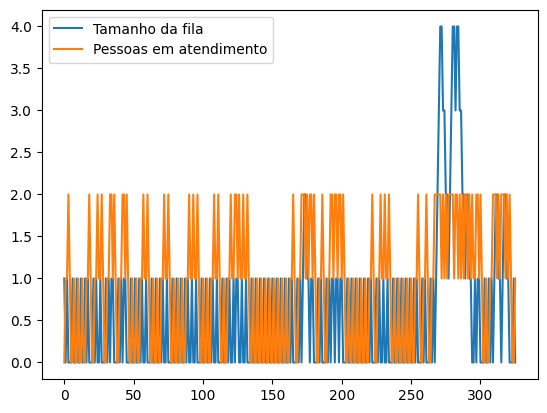

In [10]:
import matplotlib.pyplot as plt
fig, aux = plt.subplots()
eixo_x = [i for i in range(len(fila_2.cont_fila))]
aux.plot(eixo_x,fila_2.cont_fila, label = 'Tamanho da fila')
aux.plot(eixo_x, fila_2.cont_atendimento, label = 'Pessoas em atendimento')
aux.legend(loc='upper left')
plt.show()